![HenryLogo](https://d31uz8lwfmyn8g.cloudfront.net/Assets/logo-henry-white-lg.png)

# **Proyecto integrador**

### 2. Preparación de datos

Una vez entendido el contexto de la problemática y realizado el análisis exploratorio de datos de acuerdo con la descripción del dataset y la información entregada al equipo en la fase anterior, se comparte un paso a paso que deberá ser diligenciado por el equipo de ciencia de datos asignado para esta tarea con el fin de guiar el proceso de EDA y preparación de datos, lo cual es crucial antes de desarollar el modelamiento. 

El estudio tiene como objetivo la clasificación de un paciente como hospitalizado o no hospitalizado.




Carguen la base de datos y revisen el tipo de cada columna del dataset. Si es necesario realicen conversiones de tipos de datos. 

In [121]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.simplefilter("ignore")

In [122]:
# Cargamos el dataset
df = pd.read_excel(r'.\Datasets\BBDD_Hospitalización.xlsx')

Eliminen variables si es que consideran irrelevantes, sustentando adecuadamente por qué.

In [123]:
# La lista columnas_a_excluir contiene las caracteristica que no aportara mucho al modelo
columnas_a_excluir = ["HOSPITALIZACIÓN ULTIMO MES",
                     "BIOPSIAS PREVIAS",
                     "VOLUMEN PROSTATICO",
                     "ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS",
                     "NUMERO DE MUESTRAS TOMADAS",
                     "NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA",
                     "TIPO DE CULTIVO",
                     "PATRON DE RESISTENCIA",
                     "DIAS HOSPITALIZACION MQ",
                     "DIAS HOSPITALIZACIÓN UPC"]
df_hosp = df.drop(columnas_a_excluir, axis=1)
df_hosp.head(2)

,EDAD,DIABETES,PSA,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,FIEBRE,ITU,AGENTE AISLADO,HOSPITALIZACION
0,53.0,NO,4.0,NO,NO,NEG,SI,NO,NO,SI
1,56.0,NO,7.7,NO,NO,NEG,SI,NO,NO,SI


Revisen la distribución estadística para el caso de las variables numéricas. ¿Qué gráficos permiten realizar un estudio exploratorio de la distribución? ¿Hay datos atípicos?

In [124]:
round(df_hosp.describe(),2)
# En el dataset contamos con dos varibales numericas, existen dos valores atipico en edad

,EDAD,PSA
count,568.00,564.00
mean,63.88,13.27
std,9.28,15.67
min,39.00,0.60
25%,59.00,5.60
50%,64.00,8.00
75%,69.00,15.00
max,151.00,100.00


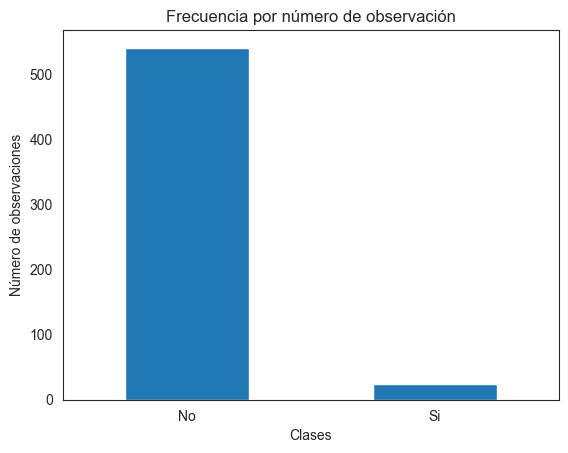

In [125]:
count_classes = pd.value_counts(df_hosp["HOSPITALIZACION"], sort = True)
count_classes.plot(kind ='bar', rot=0)
plt.xticks(range(2), labels=['No','Si'])
plt.title("Frecuencia por número de observación")
plt.xlabel("Clases")
plt.ylabel("Número de observaciones");

Si encontraron datos atípicos, ¿Imputarán o eliminarán los valores? Sustentar.

In [126]:
# Se encuentra en la caracteristica Edad dos valores atipico que superan los 100 años, 
# estos valores se imputan actualizando a la mediana
df_hosp.loc[df_hosp["EDAD"] > 84, "EDAD"] = df_hosp["EDAD"].median()
print(df_hosp.EDAD.max())

84.0


Para las variables categóricas, realizar una visualización adecuada para observar las frecuencias de cada categoría. ¿Observa alguna anomalía, problema de formato en alguna variable?

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

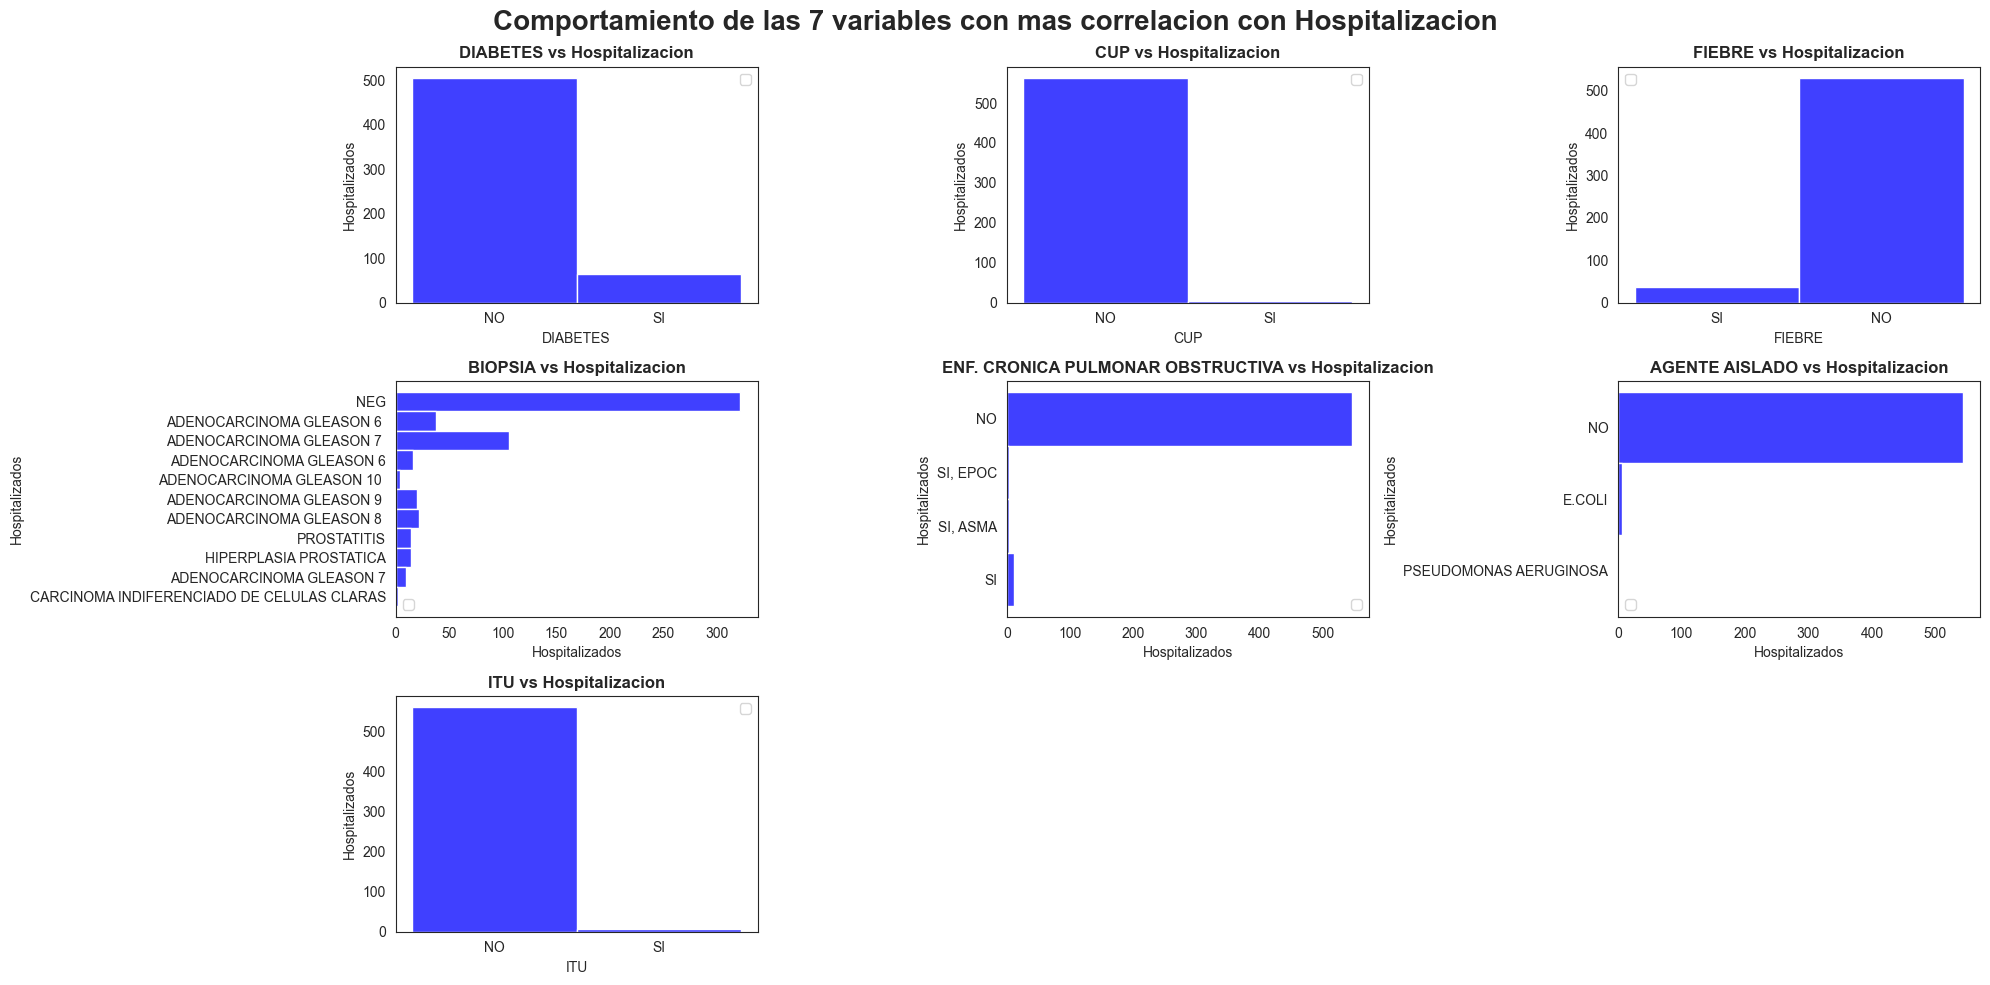

In [127]:
# Selecciono los datos en relacion a las variables
#columns = hospitalizacion[["diabetes","cup","fiebre","itu","Biopsia_NEG","Agente_PSEUDOMONAS AERUGINOSA","Agente_E.COLI"]]
columns = df_hosp[["DIABETES","CUP","FIEBRE","BIOPSIA","ENF. CRONICA PULMONAR OBSTRUCTIVA","AGENTE AISLADO","ITU"]]

plt.figure(figsize=(20, 10))
sns.set_style("white")
# Definimos subplots de 2 filas y 3 columnas, mas la ubicacion de cada grafico varia por cada ciclo del for 
for i, column in enumerate(columns):
    plt.subplot(3, 3, i+1)
    #sns.scatterplot(data=hospitalizacion, x=column, y='hospitalizacion', alpha= 0.8, color= '#04151F')
    if column in ("BIOPSIA","ENF. CRONICA PULMONAR OBSTRUCTIVA","AGENTE AISLADO"):
        sns.histplot(data= df_hosp, y = column,color = 'b')
        plt.xlabel('Hospitalizados')
    else :
        sns.histplot(data= df_hosp, x = column,color = 'b')
        plt.ylabel('Hospitalizados')
    plt.title(f'{column} vs Hospitalizacion',  fontweight="bold")
    plt.grid(False)
    plt.tight_layout()
    plt.suptitle('Comportamiento de las 7 variables con mas correlacion con Hospitalizacion', fontsize=20, fontweight="bold")
    plt.ylabel('Hospitalizados')
    plt.legend()

plt.show()

Revisen la cantidad de nulos que tiene cada columna. ¿Es necesario eliminar alguna columna? ¿Se imputarán valores? En caso de imputar, explicar en cada caso, por medio de qué estrategia lo harán. 

In [128]:
valor = df_hosp["HOSPITALIZACION"].value_counts()
print(valor[1])
if valor[0] > valor[1]:
    imputacion = 'NO'
else: 
    imputacion = 'SI'
df_hosp["HOSPITALIZACION"].fillna(value=imputacion, inplace=True)
df_hosp.info()


24
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570 entries, 0 to 569
Data columns (total 10 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   EDAD                               568 non-null    float64
 1   DIABETES                           568 non-null    object 
 2   PSA                                564 non-null    float64
 3   CUP                                567 non-null    object 
 4   ENF. CRONICA PULMONAR OBSTRUCTIVA  566 non-null    object 
 5   BIOPSIA                            568 non-null    object 
 6   FIEBRE                             568 non-null    object 
 7   ITU                                568 non-null    object 
 8   AGENTE AISLADO                     551 non-null    object 
 9   HOSPITALIZACION                    570 non-null    object 
dtypes: float64(2), object(8)
memory usage: 44.7+ KB


No se eliminaran columnas, como pueden observarse en las variables seleccioanda para este analisis, en donde se muestran valores nulos se hara imputaciones utilizando la mediana, la media o el minimo. Como primer paso se eliminan dos filas identificadas que contienen valores nulos en todas sus columnas :

In [129]:
df_hosp.drop([568,569], axis=0, inplace=True)
df_hosp.tail(3)

,EDAD,DIABETES,PSA,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,FIEBRE,ITU,AGENTE AISLADO,HOSPITALIZACION
565,69.0,NO,4.43,NaN,NO,NEG,NO,NO,NO,NO
566,67.0,NO,8.00,NO,NaN,ADENOCARCINOMA GLEASON 7,NO,NO,NaN,NO
567,59.0,NO,9.00,NO,NaN,NEG,NO,NO,NO,NO


In [130]:
# En general, se considera que un nivel de PSA normal es de hasta 4.0 nanogramos por mililitro (ng/ml) de sangre, 
# los hombres mayores a 70 años un nivel normal de PSA puede ser de hasta 7.0 ng/ml
# en el dataset se encuentra valores mayores a 7 sumando aproximandamente un total de mas de 317 registros
# Aca solo se trataran los valores nulo 
df_hosp["PSA"].fillna(value=df_hosp["PSA"].median(), inplace=True)

In [131]:
# La imputacion de valores nulos se hara utilizando valores maximo
valor = df_hosp["CUP"].value_counts()
if valor[0] > valor[1]:
    imputacion = 'NO'
else: 
    imputacion = 'SI'
df_hosp["CUP"].fillna(value=imputacion, inplace=True)

In [132]:
# Imputar valores nulo utilizando valores maximo
valor = df_hosp["ENF. CRONICA PULMONAR OBSTRUCTIVA"].value_counts()
if valor[0] > valor[1]:
    imputacion = 'NO'
else: 
    imputacion = 'SI'
df_hosp["ENF. CRONICA PULMONAR OBSTRUCTIVA"].fillna(value=imputacion, inplace=True)

In [133]:
# Imputar valores nulo utilizando valores maximo
valor = df_hosp["AGENTE AISLADO"].value_counts()
if valor[0] > valor[1]:
    imputacion = 'NO'
else: 
    imputacion = 'SI'
df_hosp["AGENTE AISLADO"].fillna(value=imputacion, inplace=True)

In [134]:
# Verifiquemos el numero de valores nulos
df_hosp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568 entries, 0 to 567
Data columns (total 10 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   EDAD                               568 non-null    float64
 1   DIABETES                           568 non-null    object 
 2   PSA                                568 non-null    float64
 3   CUP                                568 non-null    object 
 4   ENF. CRONICA PULMONAR OBSTRUCTIVA  568 non-null    object 
 5   BIOPSIA                            568 non-null    object 
 6   FIEBRE                             568 non-null    object 
 7   ITU                                568 non-null    object 
 8   AGENTE AISLADO                     568 non-null    object 
 9   HOSPITALIZACION                    568 non-null    object 
dtypes: float64(2), object(8)
memory usage: 44.5+ KB


Para el caso de las variables numéricas, ¿Es necesario normalizar?

No es necesario Normalizar

Realice las transformaciones que considere pertinentes con el fin de preparar los datos para un modelo de clasificación de un paciente con desenlace en Hospitalización. 

In [135]:
columnas_a_renombrar = {
    "EDAD" : "edad",
    "DIABETES" : "diabetes",
    "PSA" : "psa",
    "CUP" : "cup",
    "ENF. CRONICA PULMONAR OBSTRUCTIVA" : "enf_pulmonar",
    "BIOPSIA" : "biopsia",
    "FIEBRE" : "fiebre",
    "ITU" : "itu",
    "AGENTE AISLADO" : "agente_aislado",
    "HOSPITALIZACION" : "hospitalizacion"
}

In [136]:
df_hosp.rename(columns = columnas_a_renombrar,inplace=True)
df_hosp.columns

Index(['edad', 'diabetes', 'psa', 'cup', 'enf_pulmonar', 'biopsia', 'fiebre',
       'itu', 'agente_aislado', 'hospitalizacion'],
      dtype='object')

In [137]:
# Observamos que la cantidad de valores "SI, EPOC" y "SI, ASMA" no representa mucho sobre el total de los datos
enfermedad_pulmonar_cronica = {'SI, ASMA': 'SI','SI, EPOC': 'SI',}
df_hosp["enf_pulmonar"].replace(enfermedad_pulmonar_cronica,inplace=True)
df_hosp["enf_pulmonar"].unique()

array(['NO', 'SI'], dtype=object)

In [138]:
biopsia = {'NEG': 'NEGATIVO',
           'ADENOCARCINOMA GLEASON 6 ': 'ADENOCARCINOMA GLEASON 6',
           'ADENOCARCINOMA GLEASON 7 ': 'ADENOCARCINOMA GLEASON 7',
           'ADENOCARCINOMA GLEASON 10 ': 'ADENOCARCINOMA GLEASON 10',
           'ADENOCARCINOMA GLEASON 9 ': 'ADENOCARCINOMA GLEASON 9',
           'ADENOCARCINOMA GLEASON 8 ': 'ADENOCARCINOMA GLEASON 8'
          }
df_hosp["biopsia"].replace(biopsia,inplace=True)
df_hosp["biopsia"].unique()

array(['NEGATIVO', 'ADENOCARCINOMA GLEASON 6', 'ADENOCARCINOMA GLEASON 7',
       'ADENOCARCINOMA GLEASON 10', 'ADENOCARCINOMA GLEASON 9',
       'ADENOCARCINOMA GLEASON 8', 'PROSTATITIS',
       'HIPERPLASIA PROSTATICA',
       'CARCINOMA INDIFERENCIADO DE CELULAS CLARAS'], dtype=object)

In [139]:
# Verificamos y eliminamos registros duplicamos
print(df_hosp.shape)
print(f'Cantidad de duplicados : {df_hosp.duplicated().sum()}')
df_hosp.drop_duplicates(inplace=True)
print(df_hosp.shape)
print(f'Cantidad de duplicados : {df_hosp.duplicated().sum()}')

(568, 10)
Cantidad de duplicados : 125
(443, 10)
Cantidad de duplicados : 0


In [140]:
# Para facilitar los calculos se cambian los valores NO=0 y SI= 1 en aquellos
reemplazar_valores = dict(NO=0,SI=1) 
df_hosp["diabetes"].replace(reemplazar_valores,inplace=True)
df_hosp["cup"].replace(reemplazar_valores,inplace=True)
df_hosp["enf_pulmonar"].replace(reemplazar_valores,inplace=True)
df_hosp["fiebre"].replace(reemplazar_valores,inplace=True)
df_hosp["itu"].replace(reemplazar_valores,inplace=True)
df_hosp["hospitalizacion"].replace(reemplazar_valores,inplace=True)
df_hosp.head(2)

,edad,diabetes,psa,cup,enf_pulmonar,biopsia,fiebre,itu,agente_aislado,hospitalizacion
0,53.0,0,4.0,0,0,NEGATIVO,1,0,NO,1
1,56.0,0,7.7,0,0,NEGATIVO,1,0,NO,1


In [141]:
# Aplicacion de get-dummies
biopsia_dummies = pd.get_dummies(df_hosp["biopsia"],prefix="Biopsia",prefix_sep="_",dtype=int)
agente_dummies = pd.get_dummies(df_hosp["agente_aislado"],prefix="Agente",prefix_sep="_",dtype=int)
enfermedad_pulmonar_dummies = pd.get_dummies(df_hosp["enf_pulmonar"],prefix="Enf_Pulmonar",prefix_sep="_",dtype=int)

In [142]:
# Concatenamos las variables getdummis
hospitalizacion = pd.concat([df_hosp,agente_dummies,biopsia_dummies,enfermedad_pulmonar_dummies], axis=1)
# Eliminamos las variables utilizadas en el calculo de las variables getdumies
hospitalizacion.drop(["biopsia","agente_aislado","enf_pulmonar"],axis="columns",inplace=True)
hospitalizacion.head(2)

,edad,diabetes,psa,cup,fiebre,itu,hospitalizacion,Agente_E.COLI,Agente_NO,Agente_PSEUDOMONAS AERUGINOSA,...,Biopsia_ADENOCARCINOMA GLEASON 6,Biopsia_ADENOCARCINOMA GLEASON 7,Biopsia_ADENOCARCINOMA GLEASON 8,Biopsia_ADENOCARCINOMA GLEASON 9,Biopsia_CARCINOMA INDIFERENCIADO DE CELULAS CLARAS,Biopsia_HIPERPLASIA PROSTATICA,Biopsia_NEGATIVO,Biopsia_PROSTATITIS,Enf_Pulmonar_0,Enf_Pulmonar_1
0,53.0,0,4.0,0,1,0,1,0,1,0,...,0,0,0,0,0,0,1,0,1,0
1,56.0,0,7.7,0,1,0,1,0,1,0,...,0,0,0,0,0,0,1,0,1,0


Realice una matriz de correlación con el fin de determinar si hay variables redundantes. En caso de encontrar altas correlaciones, ¿Tomará alguna acción?

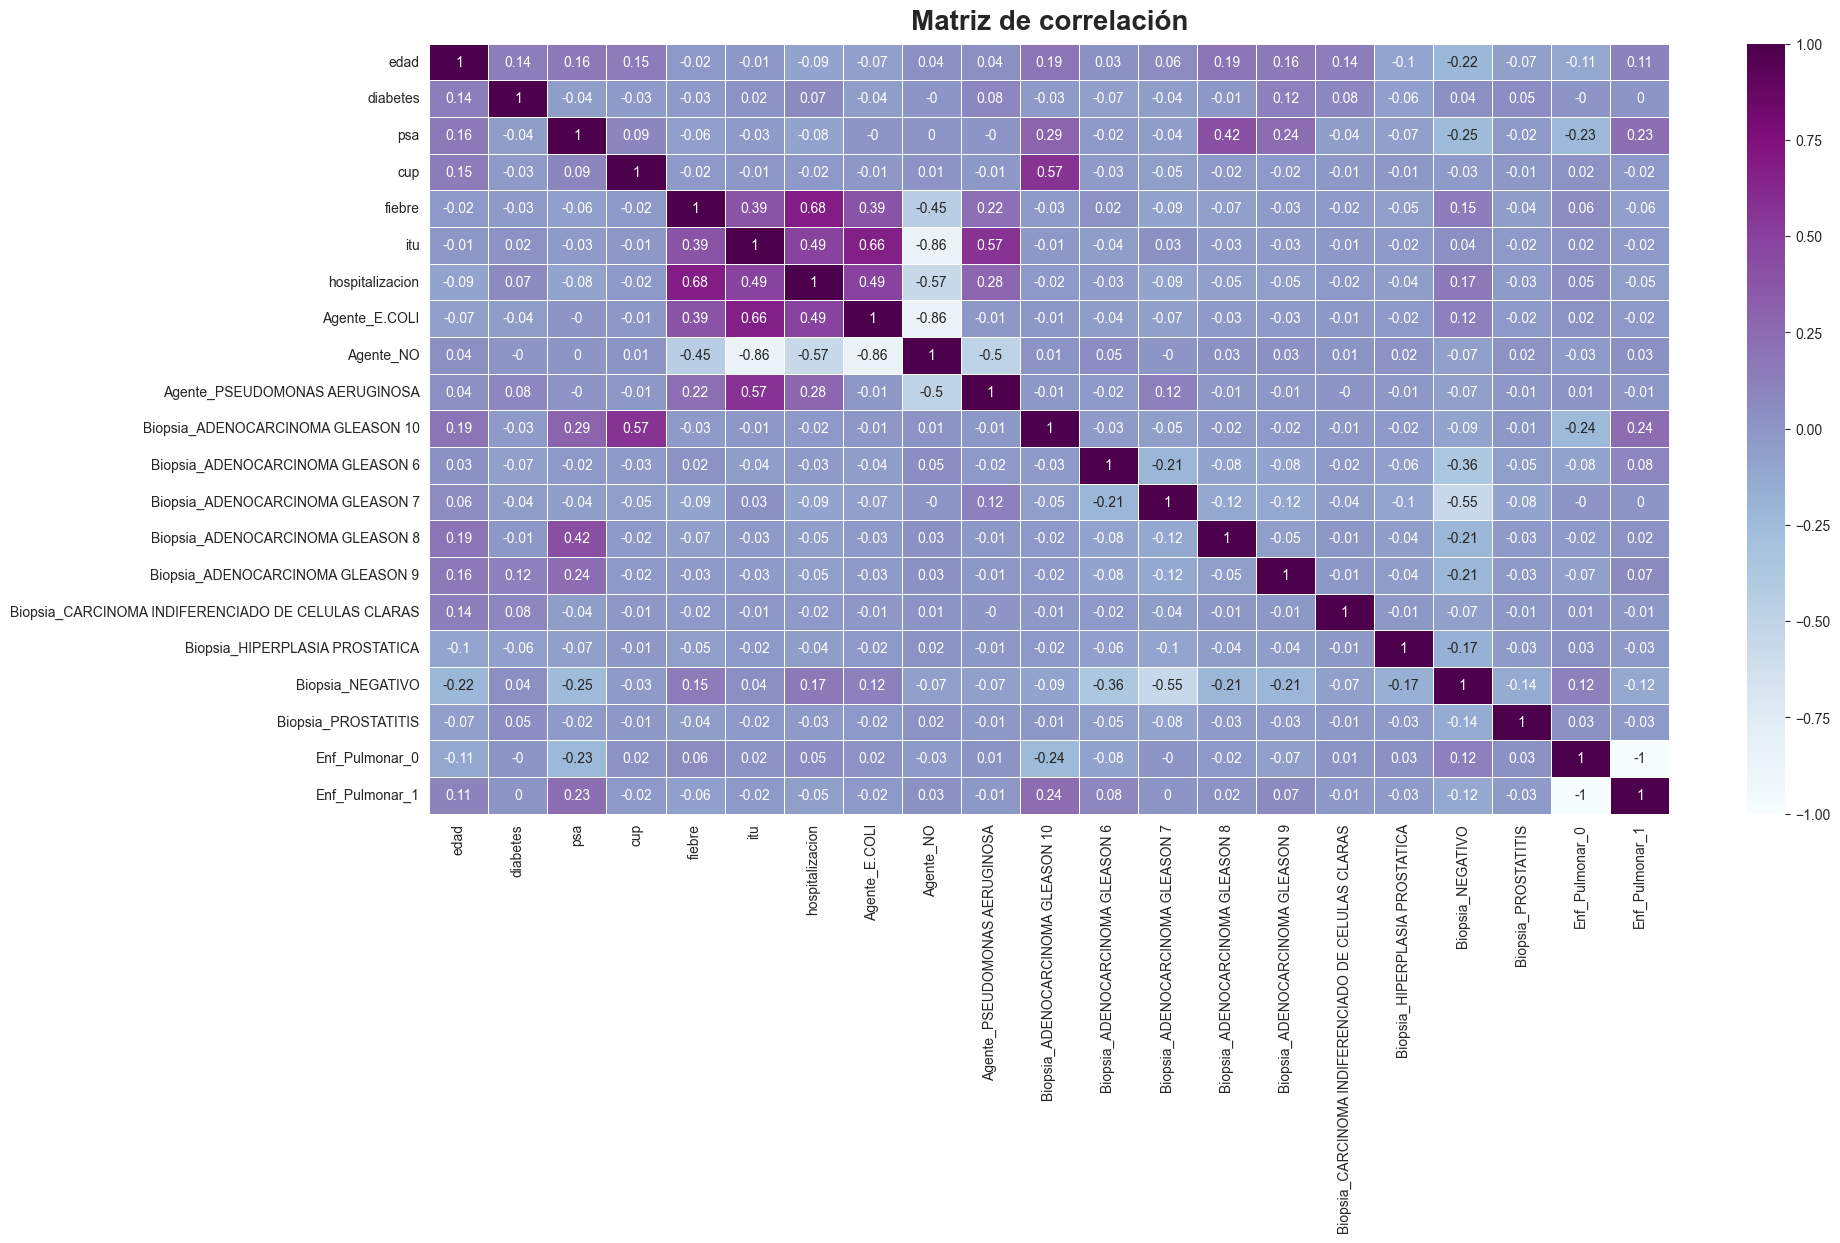

In [143]:
# Graficamos la matriz de correlacion 
plt.figure(figsize=(20, 10))
sns.heatmap(round(hospitalizacion.corr(),2), annot=True, cmap='BuPu', linewidths=.5)
plt.title('Matriz de correlación', fontweight='bold', fontsize=20, ha='center', va='bottom')
plt.show()

Exporte la base de datos preparada en un archivo .csv para el modelamiento. 

In [144]:
hospitalizacion.to_csv(r'.\Datasets\BDHospitalizacion.csv', index=False)
# Se exporta el dataset preparado